# <center> Analisis Model Regresi Linear pada Dataset Boston Housing: Menemukan Model Terbaik untuk Prediksi Harga Rumah

### ANGGOTA KELOMPOK 10 DATA SCIENCE B: <br>
| NO | NAMA |
|---------|-----------|
| 1 | BALQIS DWIAN FITRI ZAMZAMI |
| 2 | Eva Carlia |
| 3 | Naila Selvira Budiana |

# Objective :
- Mencari korelasi antarvariabel
- Menentukan rumah dengan 5 pajak terbesar
- Model mana yang signifikan dan bagus ?
- Bagaimana prediksi harga rumah dengan model terbaik?


DATA CARD

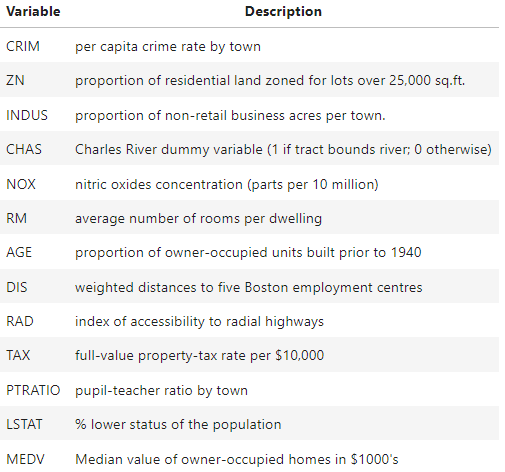

## Import Library

In [ ]:
install.packages("GGally")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("MLmetrics")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("lmtest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("car")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("DataExplorer")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(dplyr)
library(ggplot2)
library(DataExplorer)
library(MLmetrics)
library(class)
library(GGally)
library(lmtest)
library(car)

## Load Dataset

In [ ]:
df <- read.csv('HousingData.csv')
head(df)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NA,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [ ]:
dim(df)

[1] 506  14

datasetnya terdiri dari 506 baris dan 14 kolom

In [ ]:
tail(df)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
501,0.22438,0,9.69,0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
502,0.06263,0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NA,22.4
503,0.04527,0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
504,0.06076,0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
505,0.10959,0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
506,0.04741,0,11.93,0,0.573,6.030,NA,2.5050,1,273,21.0,396.90,7.88,11.9


## Data Preprocessing

In [ ]:
glimpse(df)

Rows: 506
Columns: 14
$ CRIM    <dbl> 0.00632, 0.02731, 0.02729, 0.03237, 0.06905, 0.02985, 0.08829,…
$ ZN      <dbl> 18.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.5, 12.5, 12.5, 12.5, 12.5, 1…
$ INDUS   <dbl> 2.31, 7.07, 7.07, 2.18, 2.18, 2.18, 7.87, 7.87, 7.87, 7.87, 7.…
$ CHAS    <int> 0, 0, 0, 0, 0, 0, NA, 0, 0, NA, 0, 0, 0, 0, NA, 0, 0, 0, 0, 0,…
$ NOX     <dbl> 0.538, 0.469, 0.469, 0.458, 0.458, 0.458, 0.524, 0.524, 0.524,…
$ RM      <dbl> 6.575, 6.421, 7.185, 6.998, 7.147, 6.430, 6.012, 6.172, 5.631,…
$ AGE     <dbl> 65.2, 78.9, 61.1, 45.8, 54.2, 58.7, 66.6, 96.1, 100.0, 85.9, 9…
$ DIS     <dbl> 4.0900, 4.9671, 4.9671, 6.0622, 6.0622, 6.0622, 5.5605, 5.9505…
$ RAD     <int> 1, 2, 2, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4,…
$ TAX     <int> 296, 242, 242, 222, 222, 222, 311, 311, 311, 311, 311, 311, 31…
$ PTRATIO <dbl> 15.3, 17.8, 17.8, 18.7, 18.7, 18.7, 15.2, 15.2, 15.2, 15.2, 15…
$ B       <dbl> 396.90, 396.90, 392.83, 394.63, 396.90, 394.12, 395.60, 396.90…
$ LSTAT   <dbl> 4.

In [ ]:
# Checking data type
result <- sapply(df, function(x) length(unique(x)))
result_df <- data.frame(t(result))

colnames(result_df) <- c("CRIM", "ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV")
result_df

CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
485,27,77,3,81,446,349,412,9,66,46,357,439,229


Terlihat dari output di atas
- semua atribut bertipe numerik
- kolom `CHAS` & `RAD` memiliki unique value yang sedikit, sedangkan mayoritas atribut lainnya memiliki unique value puluhan hingga ratusan. Setelah dilihat lebih lanjut ternyata untuk atribut `CHAS` berisi data biner yang mana perlu kita ubah tipe datanya menjadi factor

In [ ]:
df <- df %>%
  mutate(CHAS = as.factor(CHAS))

In [ ]:
glimpse(df)

Rows: 506
Columns: 14
$ CRIM    <dbl> 0.00632, 0.02731, 0.02729, 0.03237, 0.06905, 0.02985, 0.08829,…
$ ZN      <dbl> 18.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.5, 12.5, 12.5, 12.5, 12.5, 1…
$ INDUS   <dbl> 2.31, 7.07, 7.07, 2.18, 2.18, 2.18, 7.87, 7.87, 7.87, 7.87, 7.…
$ CHAS    <fct> 0, 0, 0, 0, 0, 0, NA, 0, 0, NA, 0, 0, 0, 0, NA, 0, 0, 0, 0, 0,…
$ NOX     <dbl> 0.538, 0.469, 0.469, 0.458, 0.458, 0.458, 0.524, 0.524, 0.524,…
$ RM      <dbl> 6.575, 6.421, 7.185, 6.998, 7.147, 6.430, 6.012, 6.172, 5.631,…
$ AGE     <dbl> 65.2, 78.9, 61.1, 45.8, 54.2, 58.7, 66.6, 96.1, 100.0, 85.9, 9…
$ DIS     <dbl> 4.0900, 4.9671, 4.9671, 6.0622, 6.0622, 6.0622, 5.5605, 5.9505…
$ RAD     <int> 1, 2, 2, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4,…
$ TAX     <int> 296, 242, 242, 222, 222, 222, 311, 311, 311, 311, 311, 311, 31…
$ PTRATIO <dbl> 15.3, 17.8, 17.8, 18.7, 18.7, 18.7, 15.2, 15.2, 15.2, 15.2, 15…
$ B       <dbl> 396.90, 396.90, 392.83, 394.63, 396.90, 394.12, 395.60, 396.90…
$ LSTAT   <dbl> 4.

In [ ]:
# Handling missing values
missing <- colSums(is.na(df))
missing_df <- data.frame(missing_values = missing)
missing_df

,missing_values
,<dbl>
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0


In [ ]:
dim(na.omit(df))

[1] 394  14

Terlihat jelas di atas masih banyak missing values pada dataset yang mana > 20% sehingga kami akan memasukkan nilai missing value menggunakan nilai mean.

In [ ]:
df$CRIM <- ifelse(is.na(df$CRIM),
                      ave(df$CRIM, FUN = function(x) mean(x, na.rm = T)), df$CRIM)

df$ZN <- ifelse(is.na(df$ZN),
                      ave(df$ZN, FUN = function(x) mean(x, na.rm = T)), df$ZN)

df$INDUS <- ifelse(is.na(df$INDUS),
                      ave(df$INDUS, FUN = function(x) mean(x, na.rm = T)), df$INDUS)

df$AGE <- ifelse(is.na(df$AGE),
                      ave(df$AGE, FUN = function(x) mean(x, na.rm = T)), df$AGE)

df$LSTAT <- ifelse(is.na(df$LSTAT),
                      ave(df$LSTAT, FUN = function(x) mean(x, na.rm = T)), df$LSTAT)

In [ ]:
df <- na.omit(df)

In [ ]:
missing <- colSums(is.na(df))
missing_df <- data.frame(missing_values = missing)
missing_df

,missing_values
,<dbl>
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0


In [ ]:
# Handling duplicated data
duplicate_values <- sum(duplicated(df))
print(duplicate_values)

[1] 0


## Exploratory Data Analysis (EDA)

Warning message in ggcorr(df, label = T, hjust = 0.9):
“data in column(s) 'CHAS' are not numeric and were ignored”


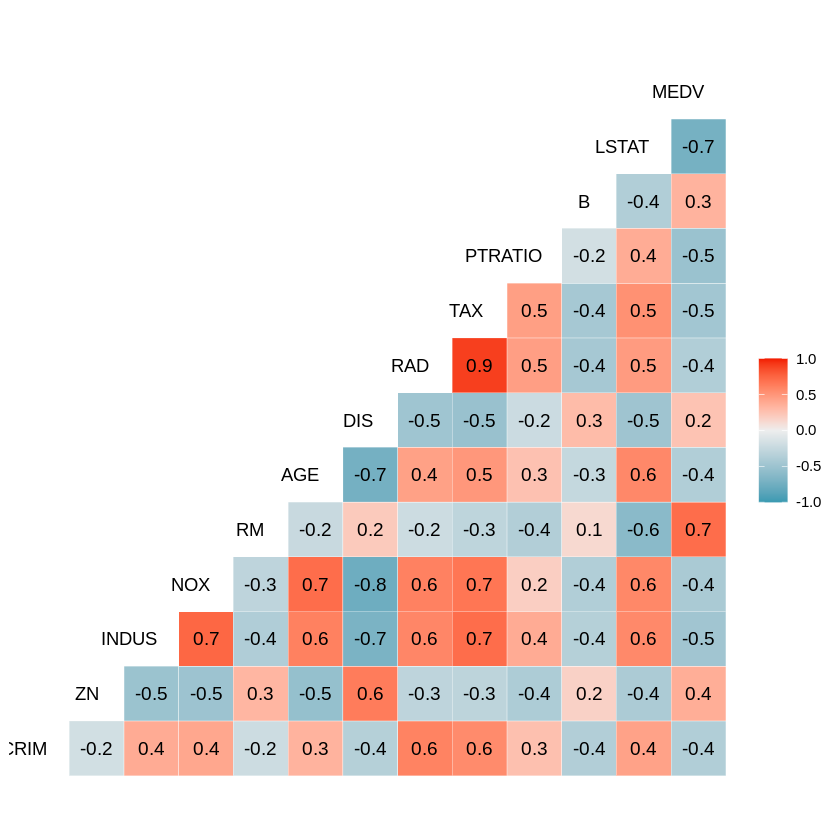

In [ ]:
ggcorr(df, label = T, hjust = 0.9)

Terlihat pada hasil output di atas :
- korelasi hubungan linear paling kuat diperoleh oleh `TAX` sebesar 0.9 terhadap `RAD`
- korelasi yang paling tidak berhubungan diperoleh oleh Variable `NOX` sebesar -0.8 terhadap `DIS`

In [ ]:
arr= arrange(df,TAX)
high = as.data.frame(table(arr["TAX"])[62:66])
high

TAX,Freq
<fct>,<int>
432,8
437,15
469,1
666,123
711,5


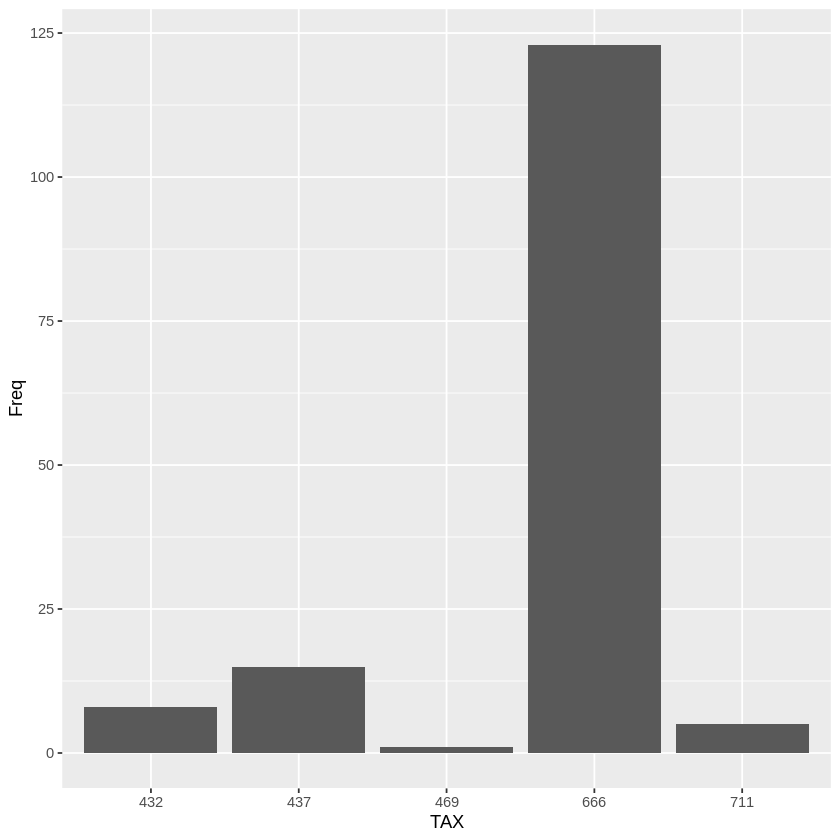

In [ ]:

# Barplot Rumah dengan TAX 5 Tertinggi
ggplot(high, aes(x=TAX, y=Freq)) +
  geom_bar(stat = "identity")

Terlihat dari

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


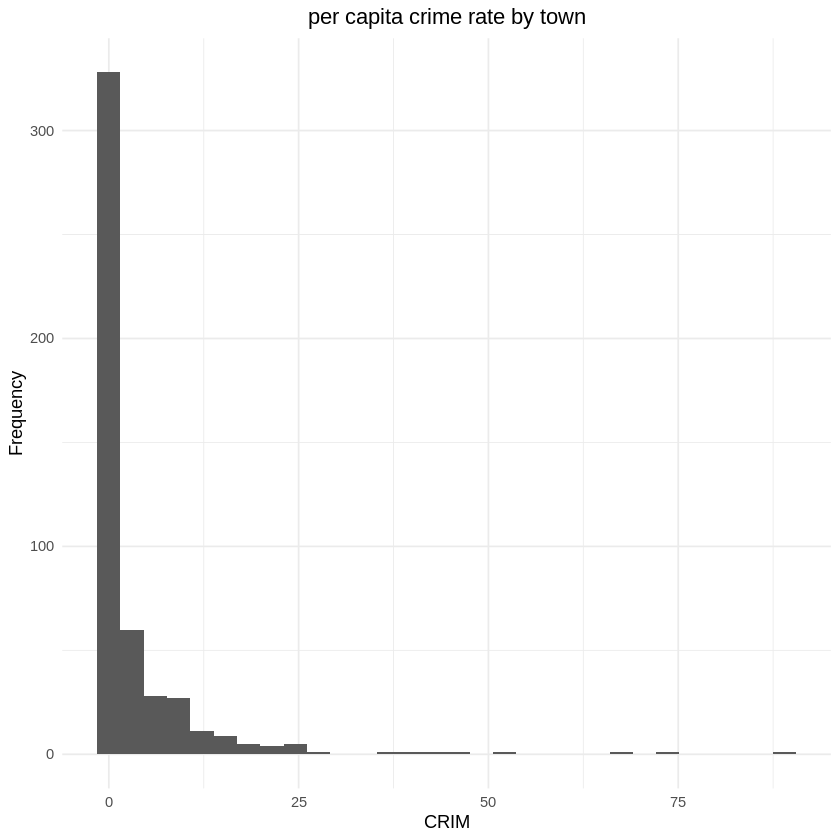

In [ ]:
#per capita crime rate by town
ggplot(df, aes(x = CRIM)) +
  geom_histogram() +
  labs(title = "per capita crime rate by town", x = "CRIM", y = "Frequency") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


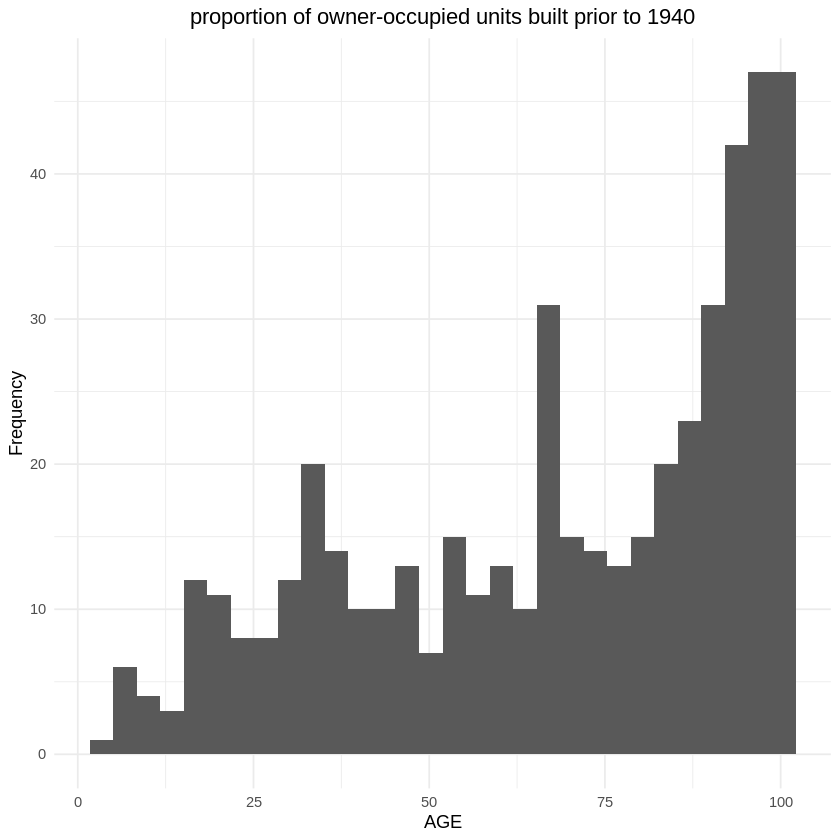

In [ ]:
ggplot(df, aes(x = AGE)) +
  geom_histogram() +
  labs(title = "proportion of owner-occupied units built prior to 1940", x = "AGE", y = "Frequency") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))

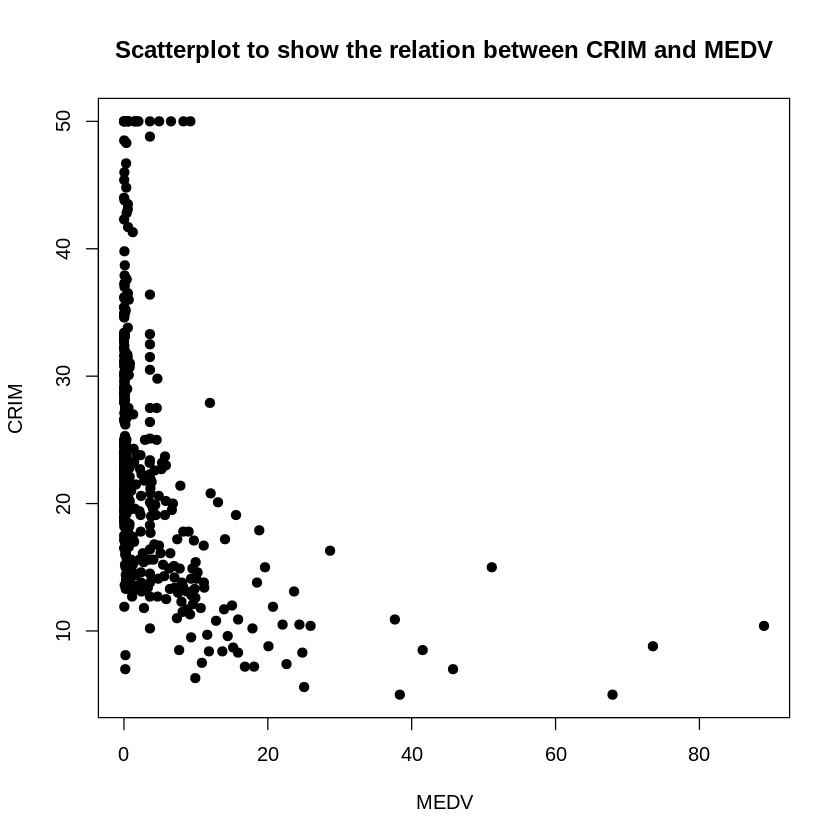

In [ ]:
plot(CRIM, MEDV, main="Scatterplot to show the relation between CRIM and MEDV",
   xlab="MEDV", ylab="CRIM", pch=19)

The following objects are masked from df (pos = 3):

    AGE, B, CHAS, CRIM, DIS, INDUS, LSTAT, MEDV, NOX, PTRATIO, RAD, RM,
    TAX, ZN




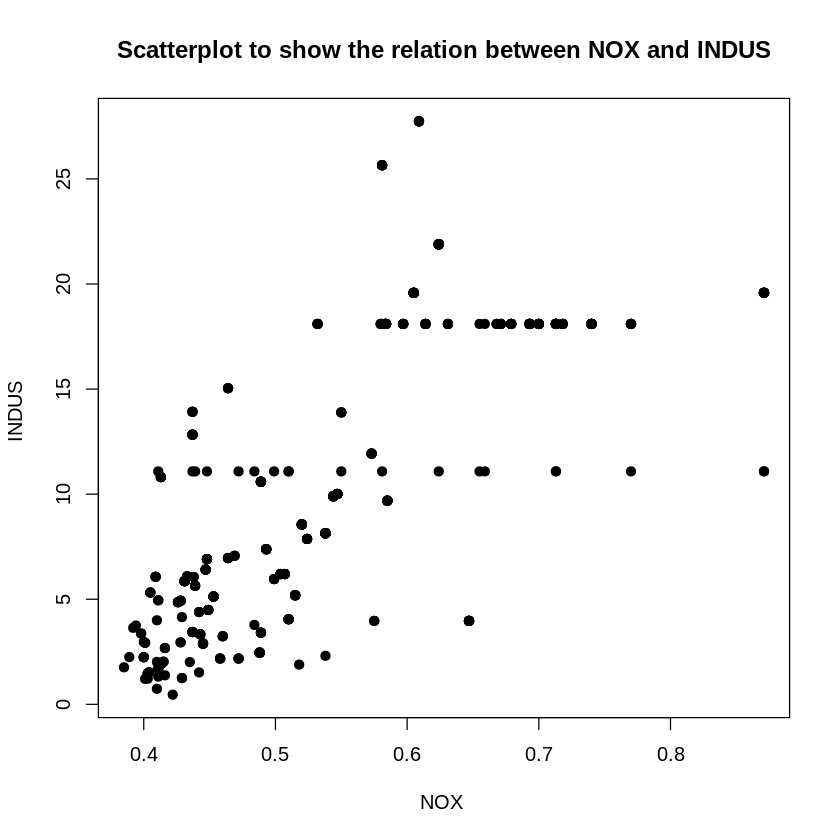

In [ ]:
#scatter plot untuk menunjukkan hubungan antara konsentrasi Nitric oxide (NOX) dengan the proporsi of non-retail business acres per kota (INDUS)

attach(df)
plot(NOX, INDUS, main="Scatterplot to show the relation between NOX and INDUS",
   xlab="NOX ", ylab="INDUS ", pch=19)

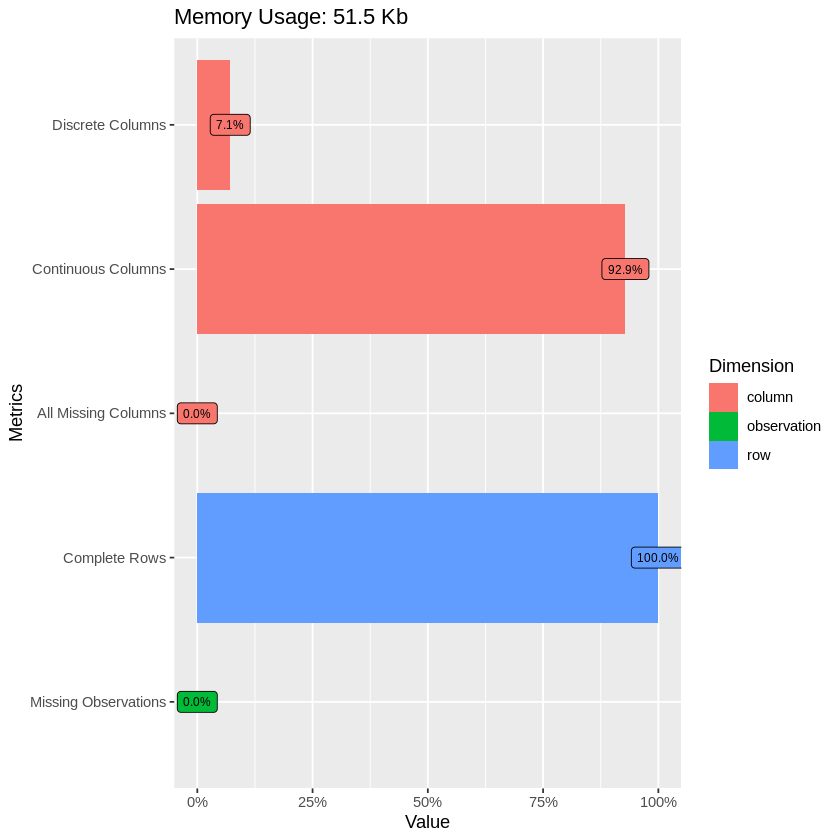

In [ ]:
plot_intro(data = df,
           geom_label_args = list(size=2.5))

## Model :

### Regresi linear dengan 1 prediktor

In [ ]:
model1 <- lm(MEDV ~ RM, data = df)
summary(model1)


Call:
lm(formula = MEDV ~ RM, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-24.255  -2.487   0.108   3.117  39.867 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -36.8574     2.6983  -13.66   <2e-16 ***
RM            9.4547     0.4259   22.20   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.558 on 484 degrees of freedom
Multiple R-squared:  0.5045,	Adjusted R-squared:  0.5035 
F-statistic: 492.8 on 1 and 484 DF,  p-value: < 2.2e-16


hasil analisis :

- Dari model1 data diperoleh nilai Intercept = -36.8574 dan koefisien RM = 9.4547 Sehingga diperoleh formula model sebagai berikut.

    `MEDV = -36.8574 + 9.4547*RM`

- Variansi variabel target MEDV dijelaskan sebesar 50.35% oleh variable RM.

### Regresi linear dengan seluruh prediktor

In [ ]:
model2 <- lm(MEDV ~., data = df)
summary(model2)


Call:
lm(formula = MEDV ~ ., data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.7626  -2.8534  -0.5878   1.7728  28.0120 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  30.310808   5.314841   5.703 2.08e-08 ***
CRIM         -0.107352   0.033081  -3.245 0.001257 ** 
ZN            0.038322   0.013991   2.739 0.006396 ** 
INDUS        -0.033622   0.061754  -0.544 0.586394    
CHAS1         2.969330   0.885392   3.354 0.000862 ***
NOX         -16.004708   3.889637  -4.115 4.57e-05 ***
RM            4.487547   0.433634  10.349  < 2e-16 ***
AGE          -0.013400   0.013246  -1.012 0.312212    
DIS          -1.458987   0.202662  -7.199 2.40e-12 ***
RAD           0.261734   0.067651   3.869 0.000125 ***
TAX          -0.010153   0.003813  -2.663 0.008012 ** 
PTRATIO      -0.921395   0.136109  -6.770 3.85e-11 ***
B             0.010677   0.002818   3.789 0.000171 ***
LSTAT        -0.443971   0.051303  -8.654  < 2e-16 ***
---
Signif. cod

hasil analisis :

- Berdasarkan output terlihat mayoritas prediktor dari hasil nilai `Pr(>|t|)` banyak yang dibawah 0.05 yang berarti prediktor signifikan

- Variansi atribut target MEDV dapat dijelaskan oleh variansi CRIM sampai LSTAT sebesar 73.20% . sisanya dijelaskan oleh atribut lain yang belum diketahui. model ini lebih efisien karena hasil yang diperoleh lebih baik dari pemodelan dengan 1 prediktor.

### Regresi linear model stepwise

In [ ]:
stepwise <- step(object = model2,
                       direction = 'backward')

Start:  AIC=1542.16
MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + 
    TAX + PTRATIO + B + LSTAT

          Df Sum of Sq   RSS    AIC
- INDUS    1      6.88 10964 1540.5
- AGE      1     23.76 10981 1541.2
<none>                 10957 1542.2
- TAX      1    164.61 11122 1547.4
- ZN       1    174.15 11131 1547.8
- CRIM     1    244.47 11202 1550.9
- CHAS     1    261.10 11218 1551.6
- B        1    333.26 11290 1554.7
- RAD      1    347.48 11305 1555.3
- NOX      1    393.04 11350 1557.3
- PTRATIO  1   1063.84 12021 1585.2
- DIS      1   1203.14 12160 1590.8
- LSTAT    1   1738.51 12696 1611.7
- RM       1   2486.17 13443 1639.5

Step:  AIC=1540.46
MEDV ~ CRIM + ZN + CHAS + NOX + RM + AGE + DIS + RAD + TAX + 
    PTRATIO + B + LSTAT

          Df Sum of Sq   RSS    AIC
- AGE      1     23.81 10988 1539.5
<none>                 10964 1540.5
- ZN       1    180.78 11145 1546.4
- TAX      1    238.05 11202 1548.9
- CRIM     1    242.29 11206 1549.1
- CHAS     1    255.08

In [ ]:
summary(stepwise)


Call:
lm(formula = MEDV ~ CRIM + ZN + CHAS + NOX + RM + DIS + RAD + 
    TAX + PTRATIO + B + LSTAT, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.5944  -2.8705  -0.5188   1.8591  27.9794 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  30.744417   5.297174   5.804 1.19e-08 ***
CRIM         -0.107709   0.033031  -3.261 0.001191 ** 
ZN            0.040587   0.013841   2.932 0.003527 ** 
CHAS1         2.883220   0.879164   3.279 0.001116 ** 
NOX         -17.483763   3.657140  -4.781 2.33e-06 ***
RM            4.435654   0.424171  10.457  < 2e-16 ***
DIS          -1.374601   0.187935  -7.314 1.11e-12 ***
RAD           0.276743   0.064956   4.260 2.46e-05 ***
TAX          -0.011182   0.003442  -3.249 0.001242 ** 
PTRATIO      -0.942039   0.134348  -7.012 8.14e-12 ***
B             0.010537   0.002805   3.757 0.000194 ***
LSTAT        -0.460114   0.048991  -9.392  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘

hasil analisis :

- Variansi atribut target MEDV dapat dijelaskan menggunakan model stepwise backward sebesar 73.24% . Model ini sedikit lebih efisien karena hasil yang diperoleh sedikit lebih baik dari pemodelan keseluruhan prediktor

### Comparation

In [ ]:
summary(model1)$r.squared

[1] 0.5045159

In [ ]:
summary(model2)$adj.r.squared

[1] 0.7319824

In [ ]:
summary(stepwise)$adj.r.squared

[1] 0.7323658

hasil analisis :

- terlihat dari hasil output di atas nilai R-Squared yang paling tinggi terdapat pada model stepwise oleh karena itu model ini akan digunakan untuk tahapan selanjutnya

notes : R-squared yang tinggi menunjukkan seberapa baik variabel prediktor dapat menjelaskan variasi dalam variabel respons.

## Cross-Validation

In [ ]:
set.seed(123)

index <- sample(nrow(df), nrow(df)*0.8)

df_train <- df[index,]
df_test <- df[-index,]

- train set

In [ ]:
model_train <- lm(MEDV ~., data = df_train)
model_test <- lm(MEDV ~., data = df_test)

stepwise_train <- step(object = model_train,
                       direction = 'backward')

Start:  AIC=1222.86
MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + 
    TAX + PTRATIO + B + LSTAT

          Df Sum of Sq    RSS    AIC
- INDUS    1      3.00 8441.4 1221.0
- AGE      1      3.91 8442.4 1221.0
<none>                 8438.4 1222.9
- TAX      1    130.11 8568.6 1226.8
- ZN       1    186.47 8624.9 1229.3
- B        1    224.41 8662.8 1231.0
- CHAS     1    289.57 8728.0 1234.0
- RAD      1    290.72 8729.2 1234.0
- NOX      1    308.69 8747.1 1234.8
- CRIM     1    314.32 8752.8 1235.0
- DIS      1    760.78 9199.2 1254.4
- PTRATIO  1    829.71 9268.2 1257.2
- LSTAT    1   1342.38 9780.8 1278.1
- RM       1   1471.31 9909.8 1283.2

Step:  AIC=1221
MEDV ~ CRIM + ZN + CHAS + NOX + RM + AGE + DIS + RAD + TAX + 
    PTRATIO + B + LSTAT

          Df Sum of Sq    RSS    AIC
- AGE      1      3.80 8445.2 1219.2
<none>                 8441.4 1221.0
- TAX      1    174.09 8615.5 1226.9
- ZN       1    191.85 8633.3 1227.7
- B        1    228.15 8669.6 1229.3
- CH

In [ ]:
summary(stepwise_train)


Call:
lm(formula = MEDV ~ CRIM + ZN + CHAS + NOX + RM + DIS + RAD + 
    TAX + PTRATIO + B + LSTAT, data = df_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.9234  -2.8494  -0.5083   1.8474  26.0741 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  32.496672   5.831973   5.572 4.80e-08 ***
CRIM         -0.146477   0.039290  -3.728 0.000223 ***
ZN            0.046775   0.015837   2.954 0.003339 ** 
CHAS1         3.558480   0.995346   3.575 0.000396 ***
NOX         -16.803922   4.076823  -4.122 4.63e-05 ***
RM            3.938991   0.480590   8.196 3.95e-15 ***
DIS          -1.259223   0.206278  -6.105 2.57e-09 ***
RAD           0.274786   0.071682   3.833 0.000148 ***
TAX          -0.010386   0.003707  -2.802 0.005350 ** 
PTRATIO      -0.928800   0.149767  -6.202 1.47e-09 ***
B             0.010193   0.003223   3.163 0.001691 ** 
LSTAT        -0.448701   0.054721  -8.200 3.85e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 

- test set

In [ ]:
stepwise_test <- step(object = model_test,
                       direction = 'backward')

Start:  AIC=324.22
MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + 
    TAX + PTRATIO + B + LSTAT

          Df Sum of Sq    RSS    AIC
- ZN       1      0.06 2013.5 322.22
- CHAS     1      3.22 2016.6 322.37
- CRIM     1      3.93 2017.3 322.41
- INDUS    1     21.51 2034.9 323.26
<none>                 2013.4 324.22
- AGE      1     91.88 2105.3 326.59
- TAX      1     95.42 2108.8 326.75
- RAD      1    122.77 2136.2 328.02
- NOX      1    136.45 2149.9 328.64
- B        1    204.73 2218.2 331.71
- LSTAT    1    261.25 2274.7 334.17
- PTRATIO  1    290.77 2304.2 335.44
- DIS      1    471.98 2485.4 342.86
- RM       1    960.11 2973.5 360.43

Step:  AIC=322.22
MEDV ~ CRIM + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + 
    PTRATIO + B + LSTAT

          Df Sum of Sq    RSS    AIC
- CHAS     1      3.25 2016.7 320.38
- CRIM     1      3.87 2017.3 320.41
- INDUS    1     21.54 2035.0 321.26
<none>                 2013.5 322.22
- TAX      1     98.62 2112.1 324.91


In [ ]:
summary(stepwise_test)


Call:
lm(formula = MEDV ~ NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + 
    B + LSTAT, data = df_test)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.7529 -2.7579 -0.2956  2.0460 28.3056 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  33.252845  12.845404   2.589 0.011271 *  
NOX         -20.330343   8.603769  -2.363 0.020333 *  
RM            5.890276   0.908864   6.481 5.10e-09 ***
AGE          -0.056298   0.030894  -1.822 0.071803 .  
DIS          -2.394567   0.500978  -4.780 6.98e-06 ***
RAD           0.359849   0.150730   2.387 0.019109 *  
TAX          -0.018182   0.008767  -2.074 0.041006 *  
PTRATIO      -1.131147   0.290839  -3.889 0.000195 ***
B             0.017614   0.005524   3.188 0.001981 ** 
LSTAT        -0.383094   0.115487  -3.317 0.001323 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.827 on 88 degrees of freedom
Multiple R-squared:  0.8106,	Adjusted R-squared:  0.7912 


hasil analisis :

- Nilai R-Squared dari stepwise_train sebesar 72.91% dan nilai R-Squared dari stepwise_test sebesar 81.06%
- Nilai AIC terendah yang diperoleh dari stepwise_train sebesar 1219.18 dan nilai AIC terendah yang diperoleh dari stepwise_test sebesar 318

## Prediction

In [ ]:
head(predict(object = stepwise_train,
        newdata = df_test, interval = 'confidence'), 5)

,fit,lwr,upr
1,29.84691,28.78465,30.90917
6,25.31990,24.16421,26.47559
18,17.33987,16.30528,18.37445
20,18.45738,17.33163,19.58312
22,17.97654,16.95281,19.00028


In [ ]:
head(predict(object = stepwise_train,
        newdata = df_test, interval = 'prediction'), 5)

,fit,lwr,upr
1,29.84691,20.467752,39.22607
6,25.31990,15.929701,34.71010
18,17.33987,7.963802,26.71593
20,18.45738,9.070818,27.84394
22,17.97654,8.601672,27.35142


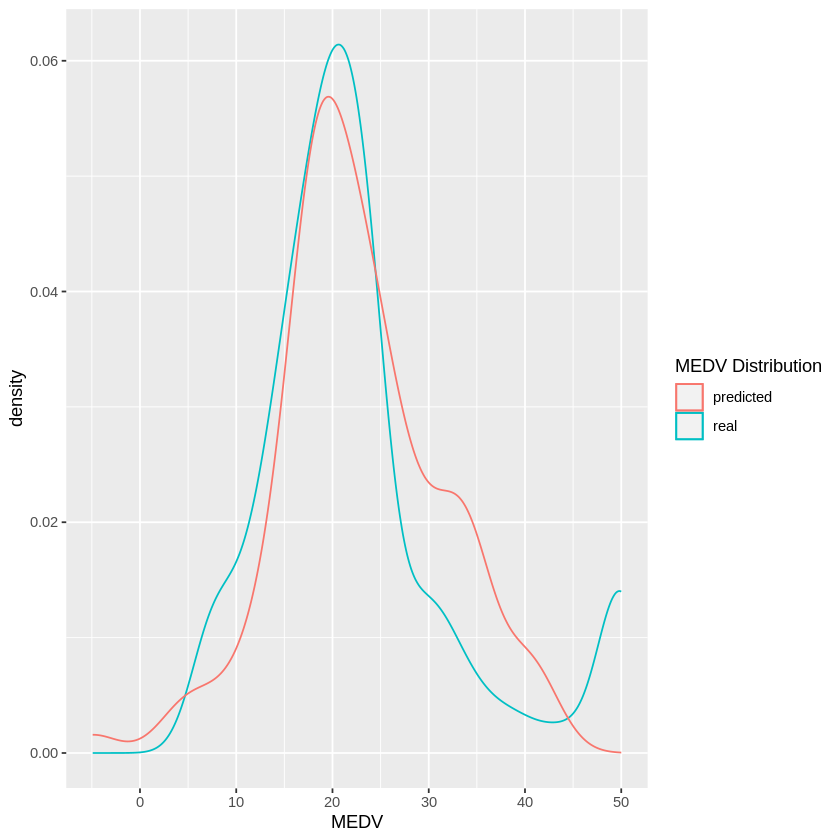

In [ ]:
predict <- predict(stepwise_train, df_test)
test_df <- cbind(df_test, pred = predict)
ggplot() +
  geom_density(data=test_df,
               mapping = aes(x = MEDV, color ='real'))+
  geom_density(data=test_df,
               mapping = aes(x = pred, color ='predicted'))+
  scale_color_discrete(name = 'MEDV Distribution')

hasil analisis :
- terlihat dari hasil plot ternyata tidak sampai 80% cocok dalam melakukan prediksi

## Comparation

In [ ]:
RMSE_train <- RMSE(y_pred = predict(stepwise, df_train),
    y_true = df_train$MEDV)

RMSE_test <- RMSE(y_pred = predict(stepwise, df_test),
    y_true = df_test$MEDV)

data.frame('RMSE_train' = RMSE_train,'RMSE_test' = RMSE_test)

RMSE_train,RMSE_test
<dbl>,<dbl>
4.691222,4.998986


hasil analisis :
- Nilai RMSE seberapa besar kesalahan rata-rata dari model dalam memprediksi variabel respons.

- **RMSE_train:** Ini menunjukkan bahwa rata-rata kesalahan prediksi dari model pertama sebesar 4.691222. Ini artinya, perbedaan antara nilai prediksi dan nilai aktual pada data sekitar 4.69.
  
- **RMSE_test:** Sedangkan nilai RMSE kedua, 4.998986, menunjukkan bahwa rata-rata kesalahan prediksi dari model kedua adalah sekitar 4.99.

Semakin rendah nilai RMSE, semakin baik performa prediksi model. Oleh karena itu, model pertama memiliki tingkat kesalahan yang lebih rendah dibandingkan dengan model kedua, yang berarti model pertama cenderung lebih baik dalam melakukan prediksi terhadap variabel respons. Namun, penting untuk mempertimbangkan konteks data spesifik dan tujuan analisis sebelum mengambil kesimpulan final terkait performa model.

## Assumptions

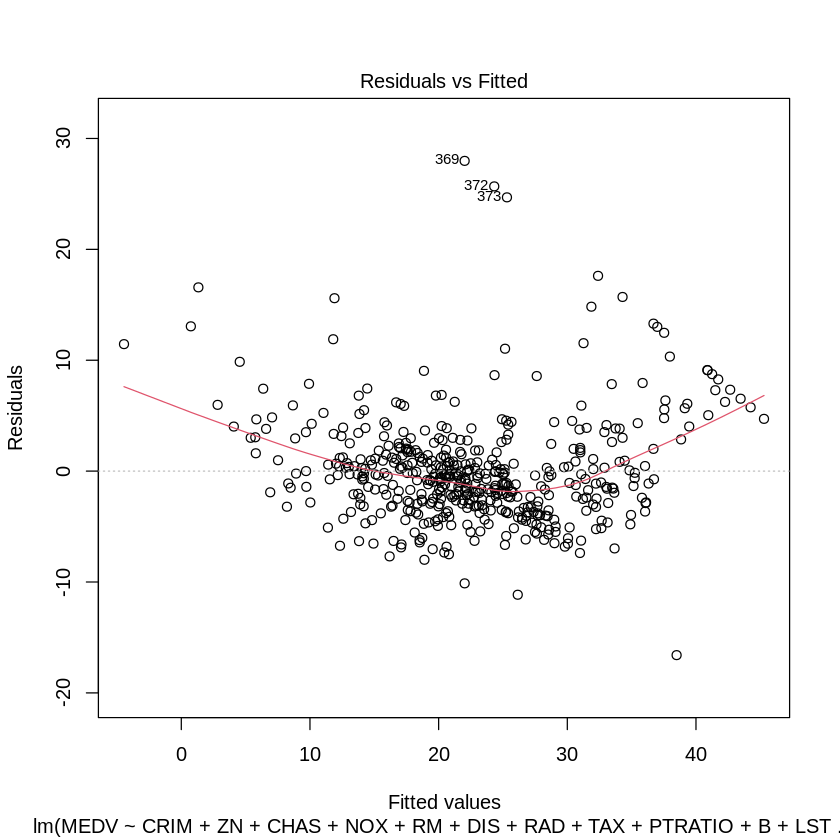

In [ ]:
# linearitas
plot(stepwise, which = 1)

hasil analisis :

model stepwise memenuhi asumsi linearity karena sebaran nilai residual “bounce randomly” atau sebaran datanya berada disekitar nilai 0.

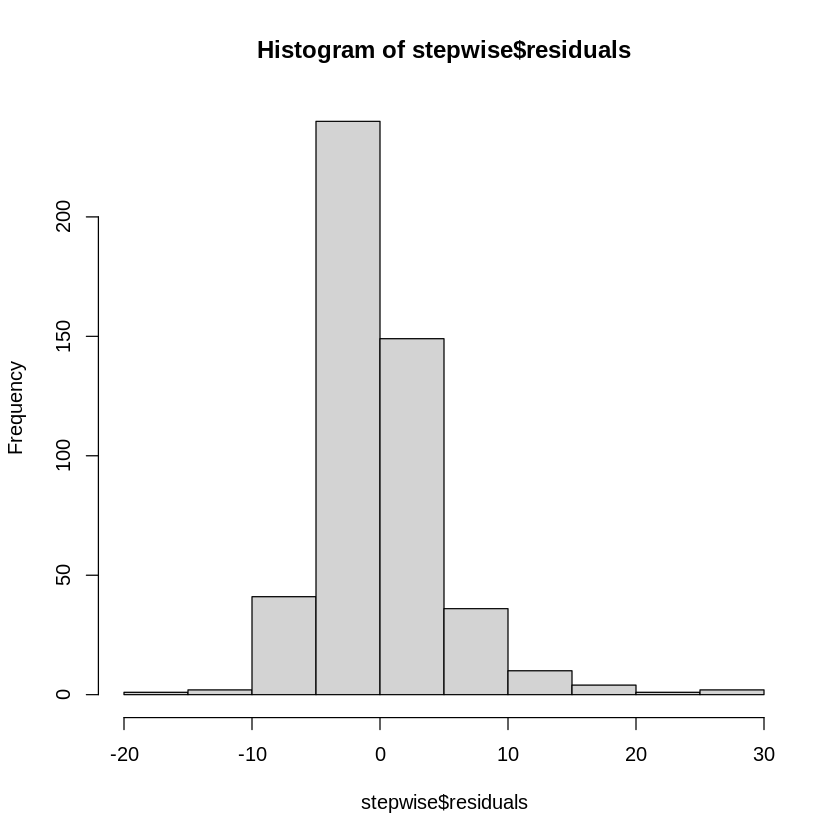

In [ ]:
# normalitas
hist(stepwise$residuals)

In [ ]:
# normalitas dengan shapiro
shapiro.test(stepwise$residuals)


	Shapiro-Wilk normality test

data:  stepwise$residuals
W = 0.89403, p-value < 2.2e-16


Shapiro-Wilk hypothesis test:

$H_0$ : berdistribusi normal <br>
$H_1$ : tidak berdistribusi normal <br>
Kondisi yang diharapkan: $H_0$

<br>

Dari hasil output yang diperoleh :
- p-value < 0.05 sehingga tolak $H_0$ yang berarti model tidak berdistribusi normal atau asumsi Normality of Residuals tidak terpenuhi




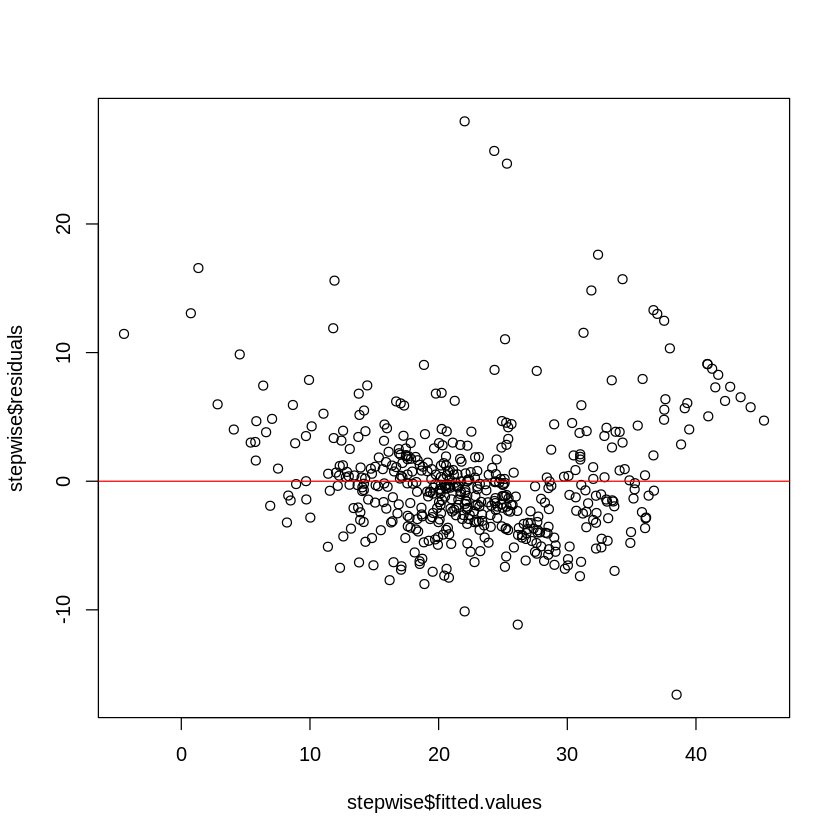

In [ ]:
# homoscedasticity
plot(x = stepwise$fitted.values, y = stepwise$residuals)
abline(h = 0, col = "red")

In [ ]:
# homoscedasticity
bptest(stepwise)


	studentized Breusch-Pagan test

data:  stepwise
BP = 58.104, df = 11, p-value = 2.082e-08


Breusch-Pagan hypothesis test:

$H_0$: homoscedasticity <br>
$H_1$: heteroscedasticity <br>
Kondisi yang diharapkan: $H_0$

<br>

Dari hasil output yang diperoleh :
p-value < 0.05 sehingga tolak $H_0$ yang berarti model mempunyai error yang menyebar tidak konstan atau heteroscedasticity dan asumsinya tidak terpenuhi

In [ ]:
# Multicollinearity
vif_values <- vif(stepwise)

In [ ]:
vif_df <- as.data.frame(vif_values)
vif_df

,vif_values
,<dbl>
CRIM,1.701916
ZN,2.133868
CHAS,1.054347
NOX,3.725858
RM,1.840166
DIS,3.247334
RAD,6.569621
TAX,6.963005
PTRATIO,1.777505


Uji VIF (Variance Inflation Factor)

nilai VIF > 10 : terjadi multicollinearity <br>
nilai VIF < 10 : tidak terjadi multicollinearity
Kondisi yang diharapkan: VIF < 10


<br>

Dari hasil output yang diperoleh :

- tidak ada multicollinearity pada model stepwise
- Dari hasil multicollinearity tidak ada nilai yang lebih dari 10, sehingga tidak ditemukan kondisi korelasi antar prediktor yang kuat. tentu saja kita tidak mengharapkan prediktor kita redundan pada sebuah model yang kita buat

> ## Conclusion


Model stepwise menjadi model yang cukup baik karena memiliki nilai R-squared paling tinggi senilai 0.732 dibandingkan model lain. Pada pengujian asumsi, model ini hanya berhasil melewati pengujian linearity dan multicollinearity sedangkan pada pengujian lainnya gagal. Jadi dari hasil asumsi tersebut untuk model stepwise memang cukup baik dibandingkan dengan model lainnya namun tidak disarankan untuk 100% terpaku terhadap hasil dalam memprediksi harga rumah terkait mungkin jika dilanjutkan lebih dalam bisa saja memperoleh hasil yang cocok untuk memprediksi harga rumah.